# Sentimental analysis


# 1. For subbreddit "virtualreality"


In [28]:
# importing neccessary libraries
import praw
import datetime
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
user_agent = "ScraperV1 by /u/aham18113"
reddit = praw.Reddit(
    client_id="uhMuPLWNAVkB-gLeuK-KHA",
    client_secret="i8hFEa-eowj2ALFXjDwRgtJ7hBk23w",
    user_agent=user_agent,
    check_for_async=False,
)

# Creating and saving titles in pandas data frame


In [30]:
headlines_vr = set()  # to prevent re-occurence
subreddit = reddit.subreddit("virtualreality")
posts = subreddit.hot(limit=None)

start_date = "01-11-23 00:00:00"
start_date = datetime.datetime.strptime(
    start_date, "%d-%m-%y %H:%M:%S").timestamp()

for post in posts:
    date = post.created_utc
    if start_date < date:
        headlines_vr.add(post.title)

df = pd.DataFrame(headlines_vr)
# print(df)
# print(df.to_string())
df.head(len(headlines_vr))

,0
0,Are we the weird friend?
1,The Vision Pro Makes me sad..
2,Any free multiplayer horror games?
3,Why is everyone comparing the Quest 3 to Alien...
4,VR flat gaming advice
...,...
939,Virtual Assistant
940,"Spacetop, the first AR laptop, is now availabl..."
941,Working out the kinks of teaching in VR. Posit...
942,My concept for a vr alien apocalypse.


# Saving data in CSV


In [31]:
df.to_csv("CSV Files/Headlines_vr.csv", header=False,
          encoding="utf-8", index=False)

# Using Natural Language Toolkit (NLTK) and "vader_lexicon" for sentiment analysis


In [32]:
# installing nltk
%pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [33]:
import nltk
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ahamg\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [34]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results_vr = []

for line in headlines_vr:
    pol_score = sia.polarity_scores(
        line
    )  # calculating the sentiment polarity scores of the headline
    pol_score["headline"] = line
    results_vr.append(pol_score)

pprint(results_vr[:], width=100)  # sentiment analysis results

[{'compound': 0.3612,
  'headline': 'Are we the weird friend?',
  'neg': 0.215,
  'neu': 0.38,
  'pos': 0.405},
 {'compound': 0.25,
  'headline': 'The Vision Pro Makes me sad..',
  'neg': 0.0,
  'neu': 0.714,
  'pos': 0.286},
 {'compound': -0.1027,
  'headline': 'Any free multiplayer horror games?',
  'neg': 0.37,
  'neu': 0.3,
  'pos': 0.33},
 {'compound': 0.0,
  'headline': 'Why is everyone comparing the Quest 3 to Alien Vs Predator?',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.0, 'headline': 'VR flat gaming advice', 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': -0.4215, 'headline': 'Guilty.', 'neg': 1.0, 'neu': 0.0, 'pos': 0.0},
 {'compound': 0.6696,
  'headline': 'Please Suggest me A Good VR under budget!',
  'neg': 0.0,
  'neu': 0.477,
  'pos': 0.523},
 {'compound': 0.0, 'headline': 'Contractors montage', 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': 0.0,
  'headline': 'Streaming with ALVR to Quest 2 across the country',
  'neg': 0.0,
  'neu': 1.0,
  'pos

In [35]:
df = pd.DataFrame.from_records(results_vr)
df.head(len(results_vr))

,neg,neu,pos,compound,headline
0,0.215,0.380,0.405,0.3612,Are we the weird friend?
1,0.000,0.714,0.286,0.2500,The Vision Pro Makes me sad..
2,0.370,0.300,0.330,-0.1027,Any free multiplayer horror games?
3,0.000,1.000,0.000,0.0000,Why is everyone comparing the Quest 3 to Alien...
4,0.000,1.000,0.000,0.0000,VR flat gaming advice
...,...,...,...,...,...
939,0.000,1.000,0.000,0.0000,Virtual Assistant
940,0.000,1.000,0.000,0.0000,"Spacetop, the first AR laptop, is now availabl..."
941,0.000,0.761,0.239,0.8442,Working out the kinks of teaching in VR. Posit...
942,0.000,1.000,0.000,0.0000,My concept for a vr alien apocalypse.


In [36]:
df["label"] = 0
df.loc[df["compound"] > 0.2, "label"] = 1  # for postive
df.loc[df["compound"] < -0.2, "label"] = -1  # for negative
df.head(len(results_vr))

,neg,neu,pos,compound,headline,label
0,0.215,0.380,0.405,0.3612,Are we the weird friend?,1
1,0.000,0.714,0.286,0.2500,The Vision Pro Makes me sad..,1
2,0.370,0.300,0.330,-0.1027,Any free multiplayer horror games?,0
3,0.000,1.000,0.000,0.0000,Why is everyone comparing the Quest 3 to Alien...,0
4,0.000,1.000,0.000,0.0000,VR flat gaming advice,0
...,...,...,...,...,...,...
939,0.000,1.000,0.000,0.0000,Virtual Assistant,0
940,0.000,1.000,0.000,0.0000,"Spacetop, the first AR laptop, is now availabl...",0
941,0.000,0.761,0.239,0.8442,Working out the kinks of teaching in VR. Posit...,1
942,0.000,1.000,0.000,0.0000,My concept for a vr alien apocalypse.,0


In [37]:
df_vr = df[["headline", "label"]]

# Saving data to CSV


In [38]:
df_vr.to_csv("CSV Files/SAR_headline_vr.csv", encoding="utf-8", index=False)

# Analyzing the number of headlines for each sentiment


In [39]:
df_vr.label.value_counts()

label
 0    468
 1    385
-1     91
Name: count, dtype: int64

In [40]:
# normalizing the counts to percentage
df_vr.label.value_counts(normalize=True) * 100

label
 0    49.576271
 1    40.783898
-1     9.639831
Name: proportion, dtype: float64

# Bar Plot


C:\Users\ahamg\AppData\Local\Temp\ipykernel_17456\2325023337.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Label", y="Value", data=plot_data_vr,


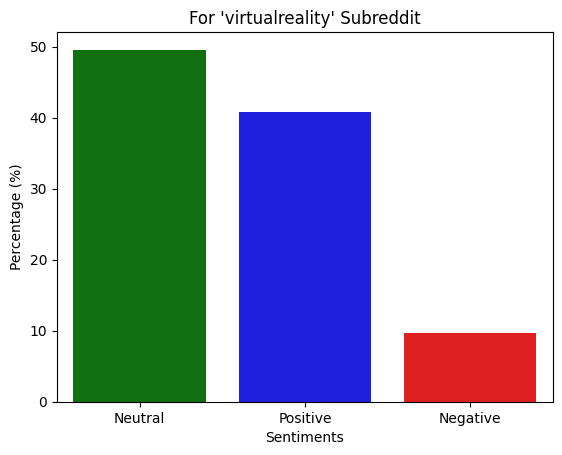

In [41]:
data1 = df_vr.label.value_counts(normalize=True) * 100

# Create a new data frame for plotting
plot_data_vr = pd.DataFrame(
    {
        "Label": data1.index.tolist(),
        "Value": data1.values.tolist(),
    }
)

# plot_data_vr

label_mapping = {-1: "Negative", 0: "Neutral", 1: "Positive"}
plot_data_vr["Label"] = plot_data_vr["Label"].replace(label_mapping)
sns.barplot(x="Label", y="Value", data=plot_data_vr,
            palette=["green", "blue", "red"])

plt.title("For 'virtualreality' Subreddit")
plt.xlabel("Sentiments")
plt.ylabel("Percentage (%)")
plt.show()

# 2. For subbreddit "webdev"


# Creating and saving titles in pandas data frame


In [42]:
headlines_wd = set()  # to prevent re-occurence
subreddit = reddit.subreddit("webdev")
posts = subreddit.hot(limit=None)

start_date = "01-11-23 00:00:00"
start_date = datetime.datetime.strptime(
    start_date, "%d-%m-%y %H:%M:%S").timestamp()

for post in posts:
    date = post.created_utc
    if start_date < date:
        headlines_wd.add(post.title)

df = pd.DataFrame(headlines_wd)
# print(df)
# print(df.to_string())
df.head(len(headlines_wd))

,0
0,Immutable array updates with Array.prototype.with
1,How do you build a production level website/we...
2,Monthly Getting Started / Web Dev Career Thread
3,Chrome developer console showing reddit job ad...
4,Help with client portal/automatic subdomain cr...
...,...
574,Can you still get Frontpage without getting a ...
575,My WordPress Site (Elementor + QuillForm) is N...
576,Modern Web Development Is Exhausting & Its Our...
577,Can you review my portfolio and give some opin...


# Saving data in CSV


In [43]:
df.to_csv("CSV Files/Headlines_wd.csv", header=False,
          encoding="utf-8", index=False)

# Using Natural Language Toolkit (NLTK) and "vader_lexicon" for sentiment analysis


In [44]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results_wd = []

for line in headlines_wd:
    pol_score = sia.polarity_scores(
        line
    )  # calculating the sentiment polarity scores of the headline
    pol_score["headline"] = line
    results_wd.append(pol_score)

pprint(results_wd[:], width=100)  # sentiment analysis results

[{'compound': 0.0,
  'headline': 'Immutable array updates with Array.prototype.with',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': 'How do you build a production level website/webapp using cloud?',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': 'Monthly Getting Started / Web Dev Career Thread',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': -0.1027,
  'headline': 'Chrome developer console showing reddit job ads and freezing Chrome',
  'neg': 0.135,
  'neu': 0.865,
  'pos': 0.0},
 {'compound': 0.5859,
  'headline': 'Help with client portal/automatic subdomain creation',
  'neg': 0.0,
  'neu': 0.455,
  'pos': 0.545},
 {'compound': 0.0,
  'headline': "Copilot has something to say - It's had enough of spaghetti code?",
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.4215,
  'headline': 'Technical onboarding optimisations?',
  'neg': 0.0,
  'neu': 0.417,
  'pos': 0.583},
 {'compound': 0.6369,
  'headline': 'Bes

In [45]:
df = pd.DataFrame.from_records(results_wd)
df.head(len(results_wd))

,neg,neu,pos,compound,headline
0,0.000,1.000,0.000,0.0000,Immutable array updates with Array.prototype.with
1,0.000,1.000,0.000,0.0000,How do you build a production level website/we...
2,0.000,1.000,0.000,0.0000,Monthly Getting Started / Web Dev Career Thread
3,0.135,0.865,0.000,-0.1027,Chrome developer console showing reddit job ad...
4,0.000,0.455,0.545,0.5859,Help with client portal/automatic subdomain cr...
...,...,...,...,...,...
574,0.000,1.000,0.000,0.0000,Can you still get Frontpage without getting a ...
575,0.000,1.000,0.000,0.0000,My WordPress Site (Elementor + QuillForm) is N...
576,0.426,0.574,0.000,-0.6369,Modern Web Development Is Exhausting & Its Our...
577,0.000,1.000,0.000,0.0000,Can you review my portfolio and give some opin...


In [46]:
df["label"] = 0
df.loc[df["compound"] > 0.2, "label"] = 1  # for postive
df.loc[df["compound"] < -0.2, "label"] = -1  # for negative
df.head(len(results_wd))

,neg,neu,pos,compound,headline,label
0,0.000,1.000,0.000,0.0000,Immutable array updates with Array.prototype.with,0
1,0.000,1.000,0.000,0.0000,How do you build a production level website/we...,0
2,0.000,1.000,0.000,0.0000,Monthly Getting Started / Web Dev Career Thread,0
3,0.135,0.865,0.000,-0.1027,Chrome developer console showing reddit job ad...,0
4,0.000,0.455,0.545,0.5859,Help with client portal/automatic subdomain cr...,1
...,...,...,...,...,...,...
574,0.000,1.000,0.000,0.0000,Can you still get Frontpage without getting a ...,0
575,0.000,1.000,0.000,0.0000,My WordPress Site (Elementor + QuillForm) is N...,0
576,0.426,0.574,0.000,-0.6369,Modern Web Development Is Exhausting & Its Our...,-1
577,0.000,1.000,0.000,0.0000,Can you review my portfolio and give some opin...,0


In [47]:
df_wd = df[["headline", "label"]]

# Saving data to CSV


In [48]:
df_wd.to_csv("CSV Files/SAR_headline_wd.csv", encoding="utf-8", index=False)

# Analyzing the number of headlines for each sentiment


In [49]:
df_wd.label.value_counts()

label
 0    360
 1    175
-1     44
Name: count, dtype: int64

In [50]:
# normalizing the counts to percentage
df_wd.label.value_counts(normalize=True) * 100

label
 0    62.176166
 1    30.224525
-1     7.599309
Name: proportion, dtype: float64

# Bar Plot


C:\Users\ahamg\AppData\Local\Temp\ipykernel_17456\293604346.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Label", y="Value", data=plot_data_wd,


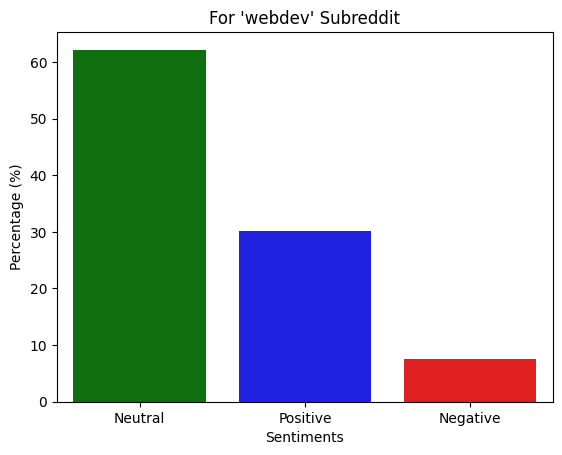

In [51]:
data2 = df_wd.label.value_counts(normalize=True) * 100

# Create a new data frame for plotting
plot_data_wd = pd.DataFrame(
    {
        "Label": data2.index.tolist(),
        "Value": data2.values.tolist(),
    }
)

# plot_data_wd

label_mapping = {-1: "Negative", 0: "Neutral", 1: "Positive"}
plot_data_wd["Label"] = plot_data_wd["Label"].replace(label_mapping)
sns.barplot(x="Label", y="Value", data=plot_data_wd,
            palette=["green", "blue", "red"])

plt.title("For 'webdev' Subreddit")
plt.xlabel("Sentiments")
plt.ylabel("Percentage (%)")
plt.show()

# Comparative sentimental analysis across the two subreddits


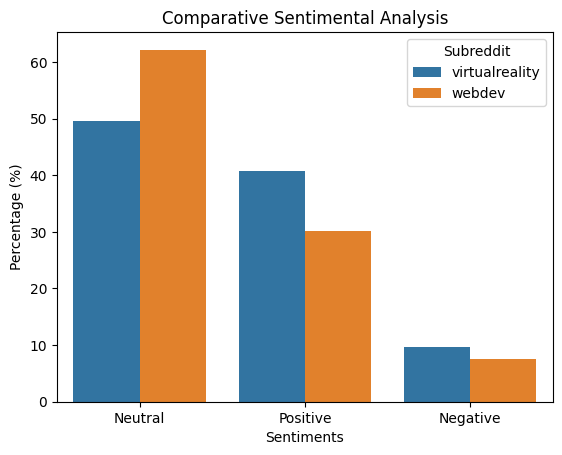

In [52]:
# Create a new data frame for plotting
plot_data = pd.DataFrame(
    {
        "Label": data1.index.tolist() + data2.index.tolist(),
        "Value": data1.values.tolist() + data2.values.tolist(),
        "Subreddit": ["virtualreality"] * len(data1) + ["webdev"] * len(data2),
    }
)

# plot_data

label_mapping = {-1: "Negative", 0: "Neutral", 1: "Positive"}
plot_data["Label"] = plot_data["Label"].replace(label_mapping)
sns.barplot(x="Label", y="Value", hue="Subreddit", data=plot_data)

plt.title("Comparative Sentimental Analysis")
plt.xlabel("Sentiments")
plt.ylabel("Percentage (%)")
plt.show()

# 3. Results:

### - Neutral Sentiments: The 'webdev' subreddit has a slightly higher percentage of neutral sentiments, around 60%, compared to the 'virtualreality' subreddit, which is around 50%.

### - Positive Sentiments: The 'virtualreality' subreddit has a higher percentage of positive sentiments. It shows that there is more positive content in this community.

### - Negative Sentiments: Both subreddits have low percentages of negative sentiments, with 'webdev' being slightly higher.
